In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

### Loading dataset

In [3]:
dataset = load_iris()

In [4]:
dir(dataset)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df['target'] = dataset.target

In [12]:
df['flower_name'] = df.target.apply(lambda index: dataset.target_names[index])

### Ploting scatter chart

In [15]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

Text(0, 0.5, 'Sepal Width')

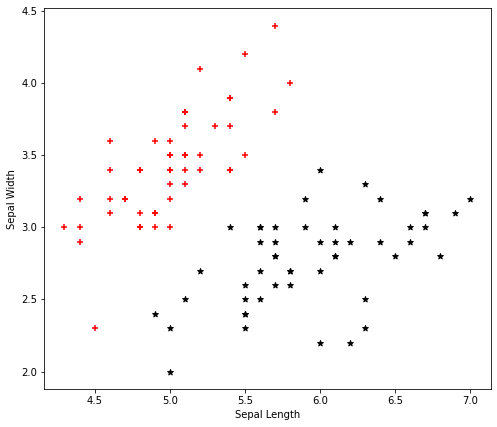

In [22]:
plt.figure(figsize=(8,7))
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='red', marker="+")
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='black', marker="*")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

Text(0, 0.5, 'Petal Width')

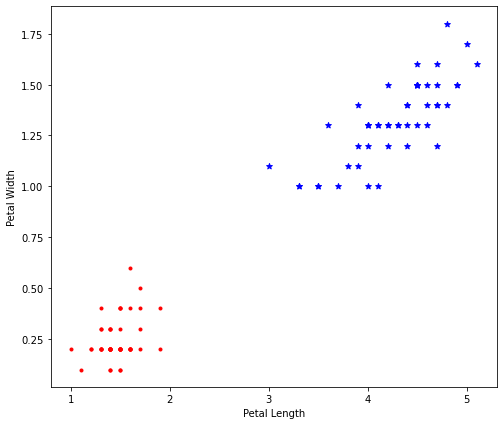

In [25]:
plt.figure(figsize=(8,7))
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='red', marker=".")
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker="*")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

### Spliting Train and Test Data

In [26]:
X = df.drop(['target','flower_name'], axis=1)
y = df['target']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Creating SVC model

In [30]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [31]:
svm.score(X_test, y_test)

1.0

In [32]:
y_predicted = svm.predict(X_test)

In [33]:
y_predicted

array([0, 2, 0, 2, 1, 0, 0, 0, 1, 2, 2, 2, 0, 0, 1, 2, 2, 1, 0, 0, 0, 1,
       1, 1, 1, 2, 2, 0, 2, 1])

### When To Use

SVM is a supervised machine learning algorithm which can be used for classification or regression problems. It uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs.

It can handle both classification and regression on linear and non-linear data.


### Pros
1. Effective on datasets with multiple features, like financial or medical data.
2. Effective in cases where number of features is greater than the number of data points.
3. Different kernel functions can be specified for the decision function. You can use common kernels, but it's also possible to specify custom kernels.
4. It is effective in high dimensional spaces.



### Cons
1. It doesn’t perform well when we have large data set because the required training time is higher
2. It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping
3. SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is included in the related SVC method of Python scikit-learn library.

### Kernel functions
#### Linear
These are commonly recommended for text classification because most of these types of classification problems are linearly separable.

#### Gaussian Radial Basis Function (RBF)
One of the most powerful and commonly used kernels in SVMs. Usually the choice for non-linear data.